In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'D:/archive (3)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 20781 files belonging to 48 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Hibiscus_Curly_Leaves', 'Hibiscus_Healthy', 'Hibiscus_Yellowish_leaves', 'Mango_Anthracnose', 'Mango_Bacterial_Canker', 'Mango_Die_Black', 'Mango_Healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Peepal_Bacterial_Leaf_Spot', 'Peepal_Healthy', 'Peepal_Yellowish_leaf', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Sq

In [12]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

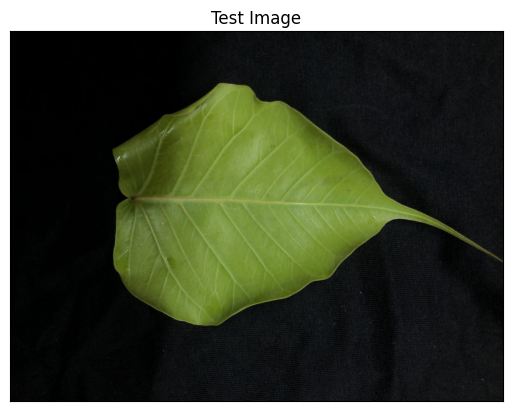

In [16]:
#Test Image Visualization
import cv2
image_path = 'D:/sem3&4ProjectCode/Sem3&4Dataset/OwnDataset/Peepal/Train/Healthy/IMG_6616.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [18]:
print(predictions)

[[2.7151545e-13 1.3536490e-13 1.4652540e-11 6.1800386e-13 2.4624685e-09
  2.8579244e-13 2.6210700e-12 3.0765483e-14 5.1985408e-12 1.0985623e-14
  2.0174699e-13 7.6261005e-14 3.8038774e-12 1.6028696e-12 1.2183173e-13
  7.3988829e-08 1.8622126e-07 1.0045821e-08 1.4230146e-11 1.3517685e-09
  1.6511242e-13 4.6655377e-11 4.7189253e-10 7.4480841e-16 1.3078050e-12
  3.0047810e-05 9.9996936e-01 2.3827558e-07 2.9800384e-11 1.6209976e-11
  9.9415033e-12 7.1787826e-16 3.3592224e-12 6.6175689e-12 1.1408700e-13
  2.8786259e-13 1.7086879e-13 1.6295434e-12 3.6138405e-11 3.5483286e-13
  1.2694613e-10 6.3302003e-10 8.3552699e-11 5.0298724e-11 4.0412899e-12
  3.9251423e-12 2.8667810e-12 4.8394233e-11]]


In [19]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

26


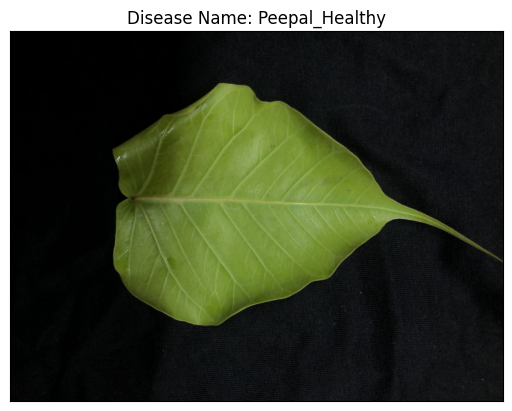

In [20]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()